Bagged Trees Development Accuracy: 0.8060
Random Forest Development Accuracy: 0.8134


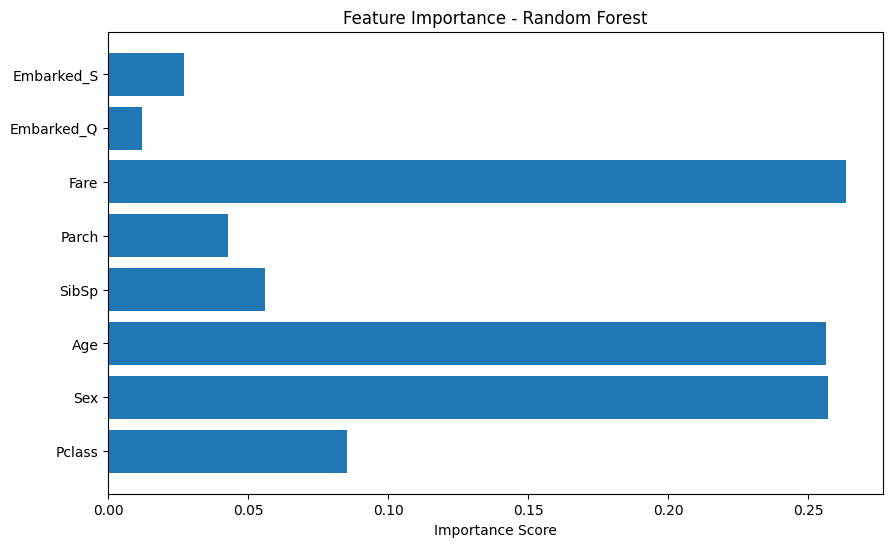

Boosted Trees Development Accuracy: 0.8284
Best Random Forest Model - n_estimators: 50, max_depth: 5, Accuracy: 0.8209
Test Accuracy of Best Random Forest Model: 0.7687

Summary of Findings:
- Bagged Trees Development Accuracy: 0.8060
- Random Forest Development Accuracy: 0.8134
- Boosted Trees Development Accuracy: 0.8284
- Best Model: Random Forest with n_estimators=50 and max_depth=5
- Test Accuracy of Best Model: 0.7687


In [ ]:
# Decision Tree Analysis on Titanic Dataset

# 1. Introduction and Objective
# In this notebook, we will create a Decision Tree model to predict the survival of passengers on the Titanic. 
# We will explore the data, preprocess it, train various tree-based models (Bagged, Random Forest, Boosted), and evaluate their performance.

# 2. Data Preparation

## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

# Loading the dataset.
data = pd.read_csv('downloads/titanic.csv')

# Displaying the first few rows of the dataset.
data.head()

# Check for missing values.
data.isnull().sum()

# Data Preprocessing - Handle missing values and encode categorical variables.
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Encoding categorical variables.
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Feature selection.
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

# Splitting data into training, development, and test sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Bagged Trees Model.
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_dev_accuracy = accuracy_score(y_dev, bagging_model.predict(X_dev))
print(f"Bagged Trees Development Accuracy: {bagging_dev_accuracy:.4f}")

# 4. Random Forest Model.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_dev_accuracy = accuracy_score(y_dev, rf_model.predict(X_dev))
print(f"Random Forest Development Accuracy: {rf_dev_accuracy:.4f}")

# Feature Importance Analysis.
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

# 5. Boosted Trees Model.
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_dev_accuracy = accuracy_score(y_dev, boosting_model.predict(X_dev))
print(f"Boosted Trees Development Accuracy: {boosting_dev_accuracy:.4f}")

# 6. Hyperparameter Tuning.
best_accuracy = 0
best_params = {}
for n in [50, 100, 150]:
    for depth in [3, 5, 7]:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        dev_acc = accuracy_score(y_dev, model.predict(X_dev))
        if dev_acc > best_accuracy:
            best_accuracy = dev_acc
            best_params = {'n_estimators': n, 'max_depth': depth}

print(f"Best Random Forest Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, Accuracy: {best_accuracy:.4f}")

# 7. Final Model Evaluation.
final_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
final_rf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, final_rf.predict(X_test))
print(f"Test Accuracy of Best Random Forest Model: {test_accuracy:.4f}")

# 8. Summary of Findings
print("\nSummary of Findings:")
print(f"- Bagged Trees Development Accuracy: {bagging_dev_accuracy:.4f}")
print(f"- Random Forest Development Accuracy: {rf_dev_accuracy:.4f}")
print(f"- Boosted Trees Development Accuracy: {boosting_dev_accuracy:.4f}")
print(f"- Best Model: Random Forest with n_estimators={best_params['n_estimators']} and max_depth={best_params['max_depth']}")
print(f"- Test Accuracy of Best Model: {test_accuracy:.4f}")

